<a href="https://colab.research.google.com/github/ngarderen/Arguments-Assignment/blob/main/Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
%load_ext google.colab.data_table


In [3]:
url = r"/content/attacks.csv"  # aankijken of dit sustainable is, waarschijnlijk niet
df = pd.read_csv(url, encoding='latin', index_col=0)
df = df.drop(["pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"], axis=1)  #drop koloms die we vermoedelijk niet nodig hebben
df = df.dropna(how='all')  # verwijder rows waar alle data Nan is, we begonnen met 25723 rijen en we hebben nog 6309 rijen over
df = df.rename(columns={"Species ": "Species"}) # spatie uit de kolomnaam gehaald
df = df.rename(columns={"Fatal (Y/N)": "Fetal"})
df = df.reset_index(drop=True) #index terug gezet naar integer, personal prefrence


Opdracht Shark Assigment

Vragen:
*   1) What are the most dangerous types of sharks to humans?
*   2) Are children more likely to be attacked by sharks?
*   3) Are shark attacks were sharks were provoked more or less dangerous
*   4) Are certain activities more likely to result in a shark attack




In [4]:
#@title Vraag 1
def antwoord_vraag1():
  # vraag 1 What are the most dangerous types of sharks to humans?
  # Bij het opschonen alle NaN weg gehaald, voor de rest de data intact gehouden we hielden 3464 rijen over
  # eerst een script gedraait die de eerste 100 rijen lieten zien, uit deze rijen de unieke shark soorten handmatig overgenomen
  # vervolgens itereer ik over alle rijen in de dataframe en kijk ik of een van de soorten uit de shark_uniek_list voort komt
  # het antwoord in een verticale bar chart gezet
  # het antwoord heeft weinig toegevoegde waarde, gezien de aangeleverde data vaak onjuist of onbekend was

  shark_uniek_list = ["white shark", "tiger shark", "lemon shark", "blue pointer", "grey nurse shark", 
                      "juvenile white shark", "sandtiger shark", "bull shark", "wobbegong shark", "grey reef shark",
                      "galapagos shark", "spinner shark", "seven-gill shark", "dogfish shark", "blacktip shark",
                      "silky shark", " bronze whaler shark", "mako shark", "oceanic whitetip shark", "raggedtooth shark",
                      "goblin shark", "caribbean reef shark", "sandbar shark", " tawney nurse shark", "porbeagle shark",
                      "salmon shark", "blue shark", "port Jackson shark"]
  shark_counter = []
  df2 = df.loc[:, "Species"]
  df2 = df2.dropna()
  df3 = df2

  for index, data in df2.items():
      data = data.lower()
      for species in shark_uniek_list:
          if species in data:
              shark_counter.append(species)

  df4 = pd.DataFrame({'Soort': shark_counter})
  df4 = df4.groupby(['Soort']).size().reset_index(name='Amount')
  df4 = df4.sort_values(by='Amount', ascending=False)
  df4 = df4.head(10)

  fig, ax = plt.subplots()
  ax.set_title("What are the most dangerous types of sharks to humans?")
  x = df4["Soort"]
  y = df4["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Soort")
  ax.xaxis.set_tick_params(rotation=45)
  ax.grid(axis="y")
  plt.bar(x,y)
  plt.show()



In [75]:
#@title Vraag 2
def antwoord_vraag2():
  # Vraag 2 Are children more likely to be attacked by sharks?

  # Er zijn veel meer aanvallen op volwassenen dan op kinderen, maar er zijn ook veel meer volwassenen dan kinderen.
  # Relatief gezien, (100/3363)*1055 = 31% van de aanvallen is op een kind.
  # Volgens data.unicef.org (shorturl.at/GPS09) is momenteel 16% van de populatie kind.
  # Oftewel 31% van de aanvallen is op 16% van de populatie, dus je zou kunnen zeggen dat een kind een grotere kans heeft om aangevallen te worden dan een volwassenen.

  df_age = df.loc[:, "Age"]
  df_age.dropna(inplace=True)
  preg_match = r'^([1-9]\d?|0|100)$'
  list_ages = []
  list_color = []


  for x in df_age:
    if re.match(preg_match, x):
      x = int(x)
      list_ages.append(x)


  for x in df_age2["Ages"]:
    if x <= 18:
      list_color.append("green")
    else:
      list_color.append("red")


  df_age2 = pd.DataFrame({'Ages': list_ages})
  df_age2 = df_age2.groupby(['Ages']).size().reset_index(name='Amount')
  df_age2 = df_age2.sort_values(by='Ages', ascending=True)


  fig, ax = plt.subplots()
  ax.set_title("Are children more likely to be attacked by sharks?")
  x = df_age2["Ages"]
  y = df_age2["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Ages")
  ax.xaxis.set_tick_params(rotation=45)
  ax.margins(x=0.02)
  ax.grid(axis="y")
  plt.bar(x, y, color=list_color)
  plt.show()

  print("")
  print(f"Totaal aantal kinderen {df_age2[df_age2['Ages'] <= 18]['Amount'].sum()}")
  print(f"Totaal aantal volwassenen {df_age2[df_age2['Ages'] > 18]['Amount'].sum()}")

In [78]:
#@title Vraag 3
def antwoord_vraag3():
  # vraag 3

  # Are shark attacks were sharks were provoked more or less dangerous?
  # Volgens de chart vrij duidelijk antwoord, provoked is velen malen

  df_fetal = df.loc[:, ["Type", "Fetal"]]
  df_fetal = df_fetal.dropna(how="any")
  df_fetal = df_fetal[(df_fetal['Type'] == 'Unprovoked') | (df_fetal['Type'] == 'Provoked')] # pak alleen data met "unprovoked" of "provoked"
  df_fetal['Fetal'] = df_fetal['Fetal'].replace(' N', 'N')
  df_fetal['Fetal'] = df_fetal['Fetal'].replace('y', 'Y')
  df_fetal = df_fetal[(df_fetal['Fetal'] == "N") | (df_fetal['Fetal'] == 'Y')]


  # berekening percentages provoked
  provoked = df_fetal[df_fetal["Type"] == "Provoked"]
  total_provoked = len(provoked)
  provoked_fetal = df_fetal[(df_fetal["Type"] == "Provoked") & (df_fetal["Fetal"] == "Y")]
  provoked_percentage_fetal = round((100 / total_provoked) * len(provoked_fetal))
  provoked_percentage_not_fetal = 100 - provoked_percentage_fetal


  # berekening percentages unprovoked
  unprovoked = df_fetal[df_fetal["Type"] == "Unprovoked"]
  total_unprovoked = len(unprovoked)
  unprovoked_fetal = df_fetal[(df_fetal["Type"] == "Unprovoked") & (df_fetal["Fetal"] == "Y")]
  unprovoked_percentage_fetal = round((100 / total_unprovoked) * len(unprovoked_fetal))
  unprovoked_percentage_not_fetal = 100 - unprovoked_percentage_fetal


  labels = ["Unprovoked", "Provoked"]
  Fetal_percentage = [provoked_percentage_fetal, unprovoked_percentage_fetal]
  Not_fetal_percentage = [provoked_percentage_not_fetal, unprovoked_percentage_not_fetal]


  fig = plt.figure(figsize=(6, 5))
  ax = fig.add_subplot(111)
  ax.bar(labels, Fetal_percentage, label="Fetal", width=0.4)
  ax.bar(labels, Not_fetal_percentage, bottom=Fetal_percentage, label="Not Fetal", width=0.4)

  ax.set_title("Are shark attacks were sharks were provoked more or less dangerous?")
  ax.set_xlabel("Type")
  ax.set_ylabel("Percentage")
  ax.legend(loc="upper right")
  ax.grid(axis="y")
  plt.show()



In [109]:
#@title Vraag 4
def antwoord_vraag4():
  # Vraag 4
  # Are certain activities more likely to result in a shark attack?

  df_activity = df.loc[:, "Activity"]
  df_activity = df_activity.dropna()

  list_activities = ["swimming", "fishing", "diving", "body surfing", 
                    "treading water", "spearfishing", "paddling", "wading", "kayaking",
                    "snorkeling", "kite surfing", "body boarding", "paddle boarding"
                    
                    ]
  activity_count = []
  failed = []

  # print(len(df_activity)) # 1422 activities

  for x in df_activity:
    x = x.lower()
    for action in list_activities:
      if x in action:
        activity_count.append(action)


  df_activity2 = pd.DataFrame({"Activity": activity_count})
  df_activity2 = df_activity2.groupby(["Activity"]).size().reset_index(name="Amount")
  df_activity2 = df_activity2.sort_values(by="Amount", ascending=False)
  df_activity2 = df_activity2.head(10)


  fig, ax = plt.subplots()
  ax.set_title("Are certain activities more likely to result in a shark attack?")
  x = df_activity2["Activity"]
  y = df_activity2["Amount"]
  ax.set_ylabel("Amount")
  ax.set_xlabel("Activity")
  ax.xaxis.set_tick_params(rotation=45)
  ax.grid(axis="y")
  plt.bar(x,y)
  plt.show()







Vraag 1
What are the most dangerous types of sharks to humans?



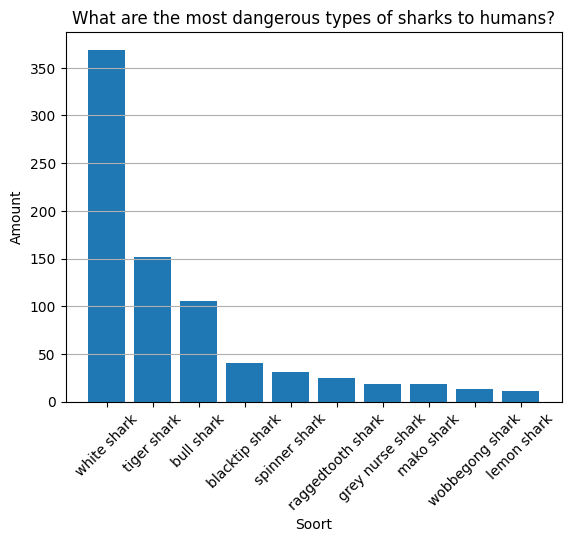

Vraag 2


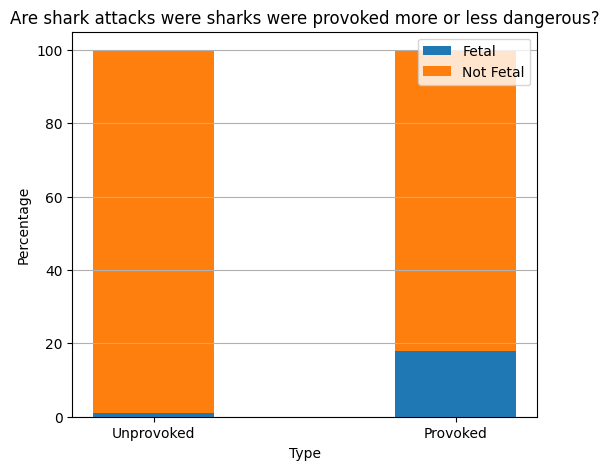

Vraag 3


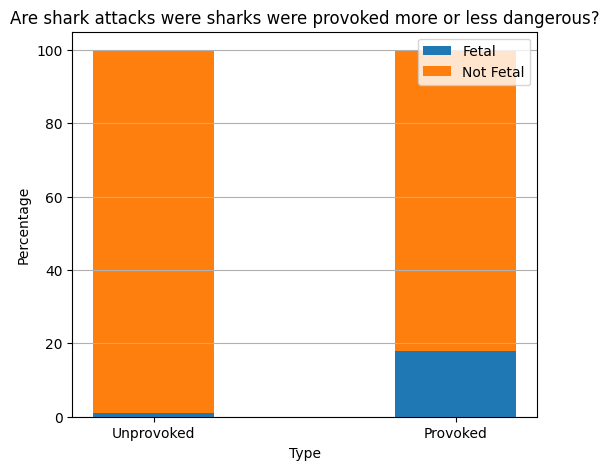

Vraag 4


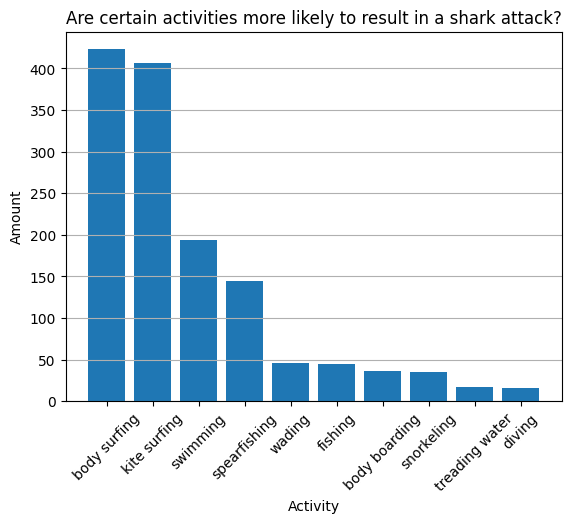

In [116]:
#@title Antwoorden

print("Vraag 1")
print("What are the most dangerous types of sharks to humans?")
print("")
antwoord_vraag1()
print("Vraag 2")
antwoord_vraag2() # Vraag 2 Are children more likely to be attacked by sharks?
print("Vraag 3")
antwoord_vraag3() # Are shark attacks were sharks were provoekd more or less dangerous?
print("Vraag 4")
antwoord_vraag4() # Are certain activities more likely to result in a shark attack?